# Module 1.2: RSA simulation

by _Benjamin Delory_,  _Guillaume Lobet_, and _Andrea Schnepf_

## Benchmark

This Jupyter Notebook contains the data analysis pipeline for Module 1.2 (RSA simulation). 

In the context of our collaborative comparison framework, all root architecture models being compared are parameterized using a common set of metrics derived from 2D images of dicotyledonous (_Lupinus albus_) and monocotyledonous (_Zea mays_) root systems. Our root architecture benchmarking dataset contains two distinct sets of images:
- [Images of lupine roots grown for 11 days in an aeroponic setup](https://github.com/RSA-benchmarks/collaborative-comparison/tree/master/root_architecture/img/dicot/lupin) (Lobet et al, 2011)
- [Images of maize roots grown for 8 days on filter papers](https://github.com/RSA-benchmarks/collaborative-comparison/tree/master/root_architecture/img/monocot/maize) (Hund et al, 2009)

All images were analysed using the semi-automated root image analysis software [SmartRoot](https://smartroot.github.io/) (Lobet et al, 2011) and root tracings were saved as [RSML](https://rootsystemml.github.io/) (Lobet et al, 2015) files for further analysis.

In Module 1.2, modellers simulate root systems for a duration of 60 days. Additional information is provided in Table 1 of the supporting paper.

_**The aim of this second benchmarking exercise is to assess if the different models diverge (or converge) if simulations are run for a longer time period.**_

For this benchmark scenario, **three data analysis pipelines** are used to compare simulation outputs given by different root architecture models.

**Pipeline 1**: _Comparison of traits computed at the root system level between simulated root systems_

1. Identifying key morphological, architectural, and topological (Fitter indices) traits explaining differences between simulated root systems using multivariate data analysis techniques (e.g., principal component analysis)

2. Looking at when simulated root systems start to diverge/converge with regard to the key root system traits identified in step 1 and how large these differences are

3. Assessing the degree of dissimilarity between simulated root systems using dissimilarity metrics

**Pipeline 2**: _Comparing dissimilarities in architecture between simulated root systems using persistent homology analysis_

1. Computing a persistence barcode for each simulated root system using a geodesic distance function

2. Computing dissimilarities between persistence barcodes using a bottleneck distance

3. Visualizing dissimilarities between root systems using multidimensional scaling

4. Testing specific hypotheses (e.g., PERMANOVA)

**Pipeline 3**: _Comparing the vertical root distribution between simulated root systems using a modelisation approach_

## Requirements

To run the code, IRkernel must be installed.

The code provided in this Jupyter Notebook relies on the functions of the archiDART R package. More information about this package can be found in [Delory et al (2016)](https://link.springer.com/article/10.1007/s11104-015-2673-4) and [Delory et al (2018)](https://f1000research.com/articles/7-22/v1).

## Install the R packages needed for the analysis

This step is only necessary if the R packages are not available.

1. Open Anaconda Prompt
2. Type "R" and press "Enter"
3. Execute: `install.packages(c("ggplot2", "gtools", "vegan", "FactoMineR", "devtools", "TDA", "geometry", "sp", "gridExtra"))`
4. You can check that the packages have been correctly installed by executing `.packages(all.available=TRUE)`
5. Close R using `q()`

## Load R packages

In [1]:
# These packages are needed for this notebook. Additional packages can also be loaded as well.
library(ggplot2)
library(gtools)
library(vegan)
library(FactoMineR)
library(TDA)
library(geometry)
library(sp)
library(gridExtra)

Loading required package: permute

Attaching package: 'permute'

The following object is masked from 'package:gtools':

    permute

Loading required package: lattice
This is vegan 2.4-4
Loading required package: magic
Loading required package: abind


## Install and load archiDART

Although archiDART is available on [CRAN](https://cran.r-project.org/package=archiDART), the latest version (under development) is available on [GitHub](https://github.com/archidart/archidart). To install archiDART from GitHub (this is the recommended version for this notebook), use the following code:

In [2]:
#This command installs archiDART from its GitHub repository (remove the hashtag in front of "devtools" to install the package)
#devtools::install_github("archidart/archidart")
library(archiDART) #This command loads the archiDART package

## Set path to the "collaborative-comparison" repository

In [3]:
#This path is user-specific, so adapt it to your situation
path<-"C:/Users/benjamindelory/Documents/GitHub/collaborative-comparison"

## Give a name to the RSA models to be compared

In [5]:
#Create one object for each RSA model
#Use the name of the fodler containing the simulated root systems
mod1<-"crootbox1"
mod2<-"crootbox2"
#Etc.

## Import RSML for simulated root systems

In [ ]:
######################################################################################################################
#If the root system age is stored as a continuous function along the root segments, what is the name of that function?
######################################################################################################################

#age<-"NAME_OF_THE_FUNCTION"
age<-"emergence_time"

###########################
#What is the vertical axis?
###########################

vertical<-"z"

####################################
#Import RSML for dicot root systems
####################################

mod1.dicot<-rsmlToTable(inputrsml=file.path(path, "root_architecture", "results", "b2", "dicot", "lupin", mod1), 
                        unitlength="cm", rsml.connect=TRUE, rsml.date=age, unitangle="d", fitter=FALSE, show.progress=FALSE, 
                        vertical3d=vertical)

#mod2.dicot<-rsmlToTable(inputrsml=file.path(path, "root_architecture", "results", "b2", "dicot", "lupin", mod2), 
                        #unitlength="cm", rsml.connect=TRUE, rsml.date=age, unitangle="d", fitter=FALSE, show.progress=FALSE, 
                        #vertical3d=vertical)

#Etc.

#####################################
#Import RSML for monocot root systems
#####################################

mod1.monocot<-rsmlToTable(inputrsml=file.path(path, "root_architecture", "results", "b2", "monocot", "maize", mod1), 
                          unitlength="cm", rsml.connect=TRUE, rsml.date=age, unitangle="d", fitter=FALSE, show.progress=FALSE, 
                          vertical3d=vertical)

mod2.monocot<-rsmlToTable(inputrsml=file.path(path, "root_architecture", "results", "b2", "monocot", "maize", mod2), 
                          unitlength="cm", rsml.connect=TRUE, rsml.date=age, unitangle="d", fitter=FALSE, show.progress=FALSE, 
                          vertical3d=vertical)

#Etc.

Number of rsml files in inputrsml: 10
No time unit found in 60_lupin_1 metadata (property-definition)
No time unit found in 60_lupin_2 metadata (property-definition)
No time unit found in 60_lupin_3 metadata (property-definition)
No time unit found in 60_lupin_4 metadata (property-definition)
No time unit found in 60_lupin_5 metadata (property-definition)
No time unit found in 60_lupin_6 metadata (property-definition)
No time unit found in 60_lupin_7 metadata (property-definition)
No time unit found in 60_lupin_8 metadata (property-definition)
No time unit found in 60_lupin_9 metadata (property-definition)
No time unit found in 60_lupin_10 metadata (property-definition)
Number of rsml files in inputrsml: 10
No time unit found in 60_maize_1 metadata (property-definition)


## Plot simulated root systems

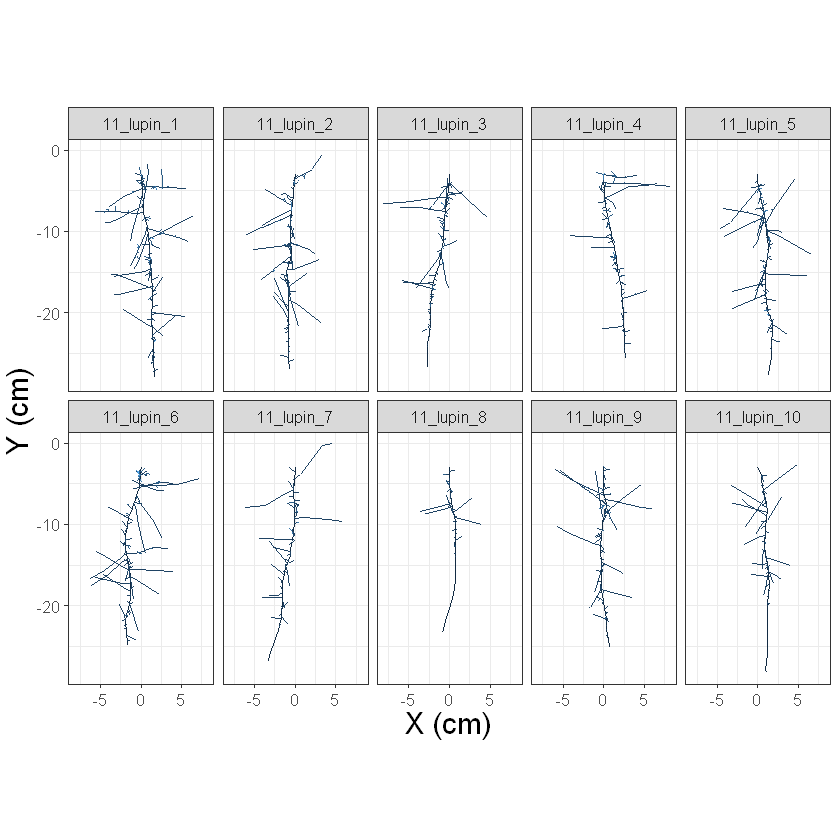

In [35]:
######################################
#Plot simulated root systems for dicot
######################################

ggplot(transform(mod1.dicot, file=factor(file, levels=unique(file))))+
geom_segment(aes(x=x1, y=z1, xend=x2, yend=z2, col=order), size=0.5, alpha=1)+
coord_fixed()+
theme_bw()+
facet_wrap(~file, ncol=5)+
xlab("X (cm)")+
ylab("Y (cm)")+
theme(axis.title=element_text(size=18), text=element_text(size=12), legend.position="none")

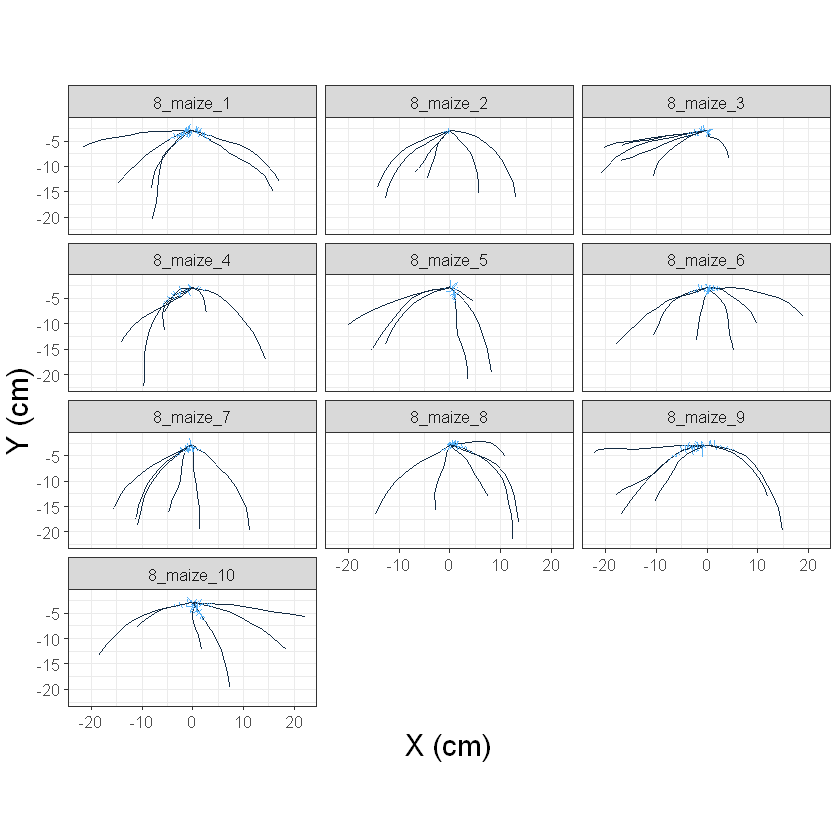

In [37]:
########################################
#Plot simulated root systems for monocot
########################################

ggplot(transform(mod1.monocot, file=factor(file, levels=unique(file))))+
geom_segment(aes(x=x1, y=z1, xend=x2, yend=z2, col=order), size=0.5, alpha=1)+
coord_fixed()+
theme_bw()+
facet_wrap(~file, ncol=3)+
xlab("X (cm)")+
ylab("Y (cm)")+
theme(axis.title=element_text(size=18), text=element_text(size=12), legend.position="none")

## Pipeline 1: _Comparison of traits computed at the root system level between simulated root systems_

### 1.1. Identifying key morphological, architectural, and topological traits explaining differences between simulated root systems

In archiDART, the `architect` function can be used to compute root system traits. For each root system and each observation date, the following parameters will be calculated:

- **TRL**: total root length
- **GRTR**: growth rate of the root system
- **L1R**: first-order root length
- **GR1R**: first-order root growth rate
- **TN1R**: total number of first-order roots
- **TNLR**: total number of lateral roots
- **TLRL**: total lateral root length
- **NxLR**: total number of lateral roots with a branching order equal to x
- **LxLR**: total length of lateral roots with a branching order equal to x
- **MLxLR**: mean length of lateral roots with a branching order equal to x
- **GRxL**: growth rate of roots with a branching order equal to x
- **D2LR**: density of secondary roots on first-order roots
- **Height**: root system height
- **Width**: root system width
- **ConvexhullXY**: area of the convex hull on the XY plane
- **ConvexhullXZ**: area of the convex hull on the XZ plane
- **ConvexhullYZ**: area of the convex hull on the YZ plane
- **Convexhull3D**: volume of the convex hull (for 3D root systems)
- **Magnitude**: the magnitude of the root system (Fitter, 1986, 1987)
- **Altitude**: the altitude of the root system (Fitter, 1986, 1987)
- **ExtPathLength**: the total exterior path length of the root system (Fitter, 1986, 1987)

If diameter values are provided in the RSML files, the following parameters will be calculated for each root system at the last observation date:

- **MDx**: mean diameter of roots with a branching order equal to x
- **MDLR**: mean lateral root diameter
- **Sx**: total surface area of roots with a branching order equal to x
- **Stot**: total root surface area
- **Vx**: total volume of roots with a branching order equal to x
- **Vtot**: the root system volume

The rsmlToTable objects created earlier can directly be used as an input of the `architect` function. Root system traits can be calculated using the following code:

In [41]:
######################################################
#Compute root system traits for simulated root systems
######################################################

#For the dicot
plant.mod1.dicot<-architect(inputrsml=mod1.dicot, vertical3d=vertical, fitter=TRUE)
plant.mod1.dicot$model<-mod1
#plant.mod2.dicot<-architect(inputrsml=mod2.dicot, vertical3d=vertical, fitter=TRUE)
#plant.mod2.dicot$model<-mod2
#Etc.

#For the monocot
plant.mod1.monocot<-architect(inputrsml=mod1.monocot, vertical3d=vertical, fitter=TRUE)
plant.mod1.monocot$model<-mod1
#plant.mod2.monocot<-architect(inputrsml=mod2.monocot, vertical3d=vertical, fitter=TRUE)
#plant.mod2.monocot$model<-mod2
#Etc.

We will now use **principal component analysis (PCA)** to identify the root system traits explaining the greatest amount of variation between simulated root systems. To do this, we first need to create new objects containing root system traits calculated at the last observation date (60 days). We can do this using the following code:

Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
"zero-length arrow is of indeterminate angle and so skipped"

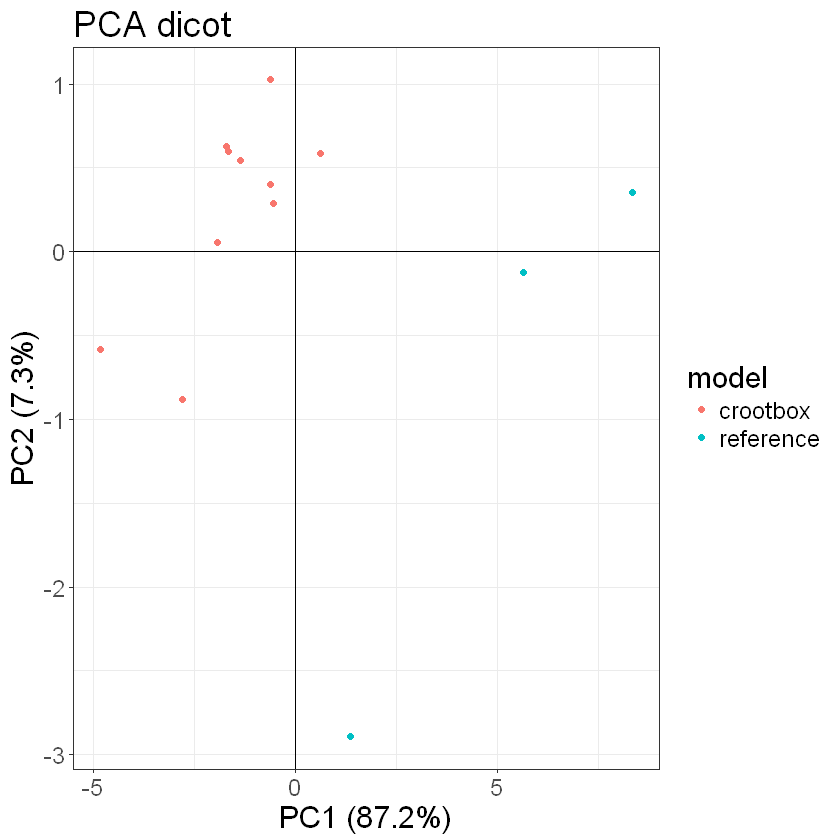

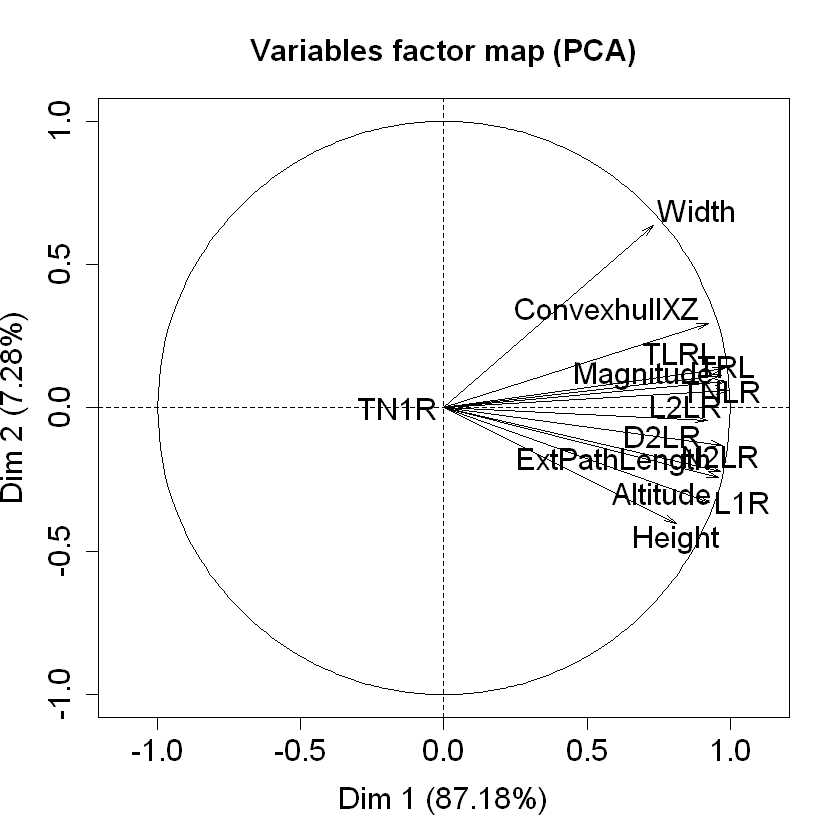

In [42]:
#In rsml from reference images, y is the vertical axis by default
#If z is the vertical axis of simulated root systems, then ConvexhullXY in plant.dicot becomes ConvexhullXZ

plant.dicot$ConvexhullXZ<-plant.dicot$ConvexhullXY

#######################
#Create table for dicot
#######################

#datadicot<-smartbind(plant.dicot, plant.mod1.dicot, plant.mod2.dicot) #Add more objects if needed
datadicot<-smartbind(plant.dicot, plant.mod1.dicot)
datadicot<-datadicot[datadicot$Time==11,] #Select traits measured at the last observation date

#################
#Do PCA for dicot
#################

#Select variables for PCA

datapca<-datadicot[,c("TRL", "L1R", "TN1R", "TNLR", "TLRL", "N2LR", "L2LR", "D2LR", "Height", "Width", "ConvexhullXZ",
                      "Magnitude", "Altitude", "ExtPathLength", "model")]

#PCA dicot
pca<-PCA(datapca, scale.unit=TRUE, ncp=3, quali.sup=which(colnames(datapca)=="model"), graph=FALSE)
indpca<-as.data.frame(pca$ind$coord)
indpca<-as.data.frame(lapply(indpca, function(x) as.numeric(as.character(x))))
indpca$model<-datadicot$model

#Plot PCA dicot
ggplot(indpca)+
geom_point(aes(Dim.1, Dim.2, colour=model))+
xlab(paste("PC1 (", round(pca$eig[1,2], 1), "%)", sep=""))+
ylab(paste("PC2 (", round(pca$eig[2,2], 1), "%)", sep=""))+
ggtitle("PCA dicot")+
geom_hline(yintercept=0)+
geom_vline(xintercept=0)+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

#Plot correlation circle
par(ps = 18, cex = 1, cex.main = 1)
plot(pca, choix="var")

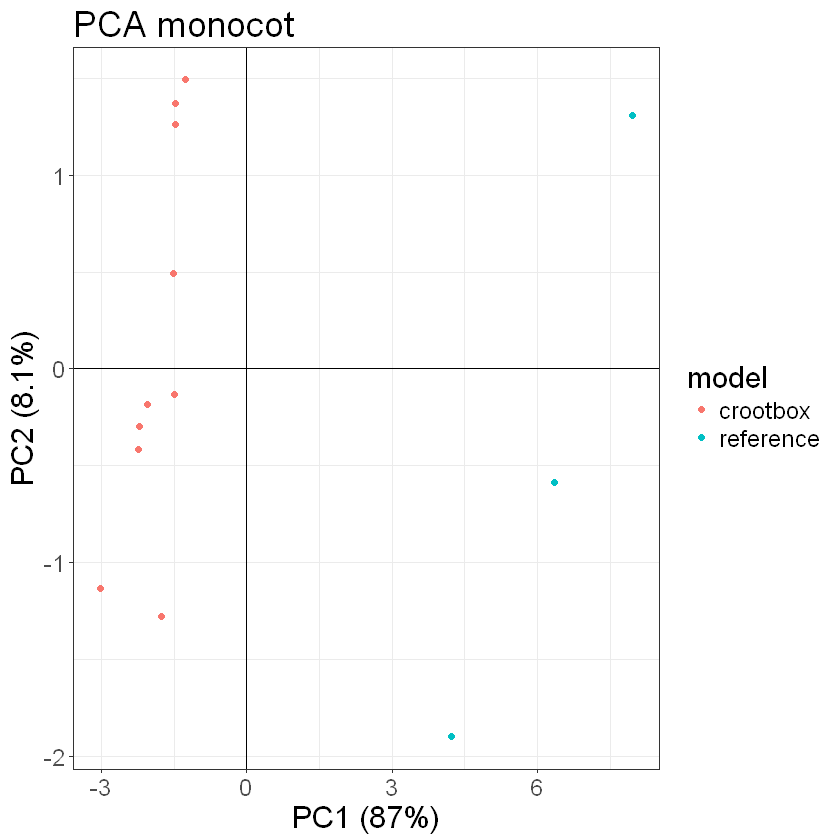

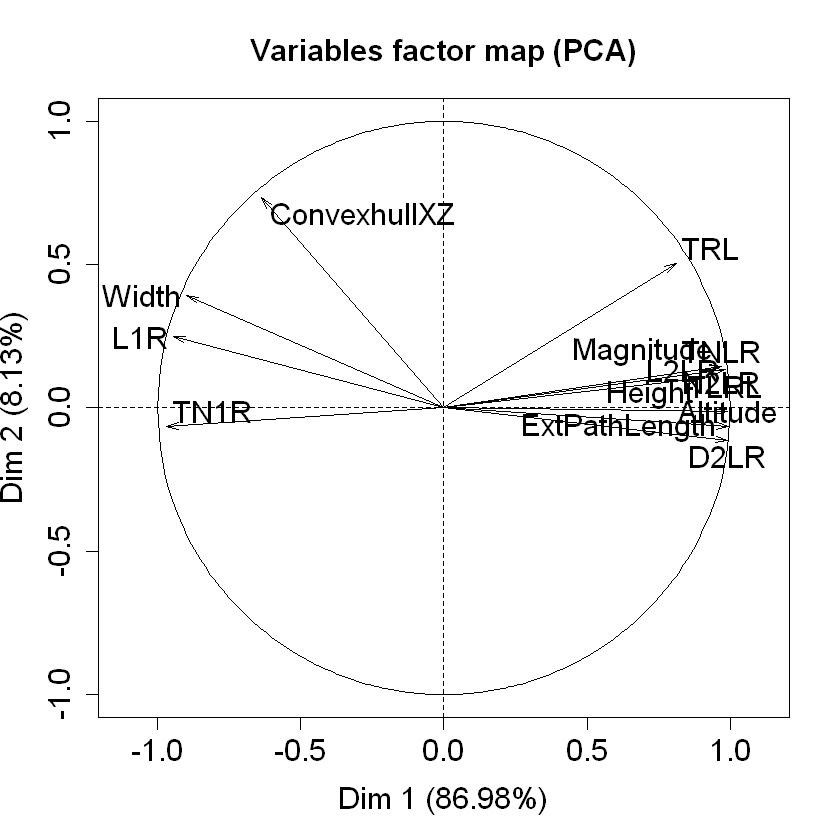

In [43]:
#In rsml from reference images, y is the vertical axis by default
#If z is the vertical axis of simulated root systems, then ConvexhullXY in plant.monocot becomes ConvexhullXZ

plant.monocot$ConvexhullXZ<-plant.monocot$ConvexhullXY

#########################
#Create table for monocot
#########################

#datamonocot<-smartbind(plant.monocot, plant.mod1.monocot, plant.mod2.monocot) #Add more objects if needed
datamonocot<-smartbind(plant.monocot, plant.mod1.monocot)
datamonocot<-datamonocot[datamonocot$Time==8,] #Select traits measured at the last observation date

####################
#Do PCA for monocot
####################

#Select variables for PCA
datapca<-datamonocot[,c("TRL", "L1R", "TN1R", "TNLR", "TLRL", "N2LR", "L2LR", "D2LR", "Height", "Width", "ConvexhullXZ",
                        "Magnitude", "Altitude", "ExtPathLength", "model")]

#PCA monocot
pca<-PCA(datapca, scale.unit=TRUE, ncp=3, quali.sup=which(colnames(datapca)=="model"), graph=FALSE)
indpca<-as.data.frame(pca$ind$coord)
indpca<-as.data.frame(lapply(indpca, function(x) as.numeric(as.character(x))))
indpca$model<-datamonocot$model

#Plot PCA monocot
ggplot(indpca)+
geom_point(aes(Dim.1, Dim.2, colour=model))+
xlab(paste("PC1 (", round(pca$eig[1,2], 1), "%)", sep=""))+
ylab(paste("PC2 (", round(pca$eig[2,2], 1), "%)", sep=""))+
ggtitle("PCA monocot")+
geom_hline(yintercept=0)+
geom_vline(xintercept=0)+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

#Plot correlation circle
par(ps = 18, cex = 1, cex.main = 1)
plot(pca, choix="var")

### 1.2. Looking at when simulated and reference root systems start to diverge/converge with regard to the key root system traits identified in step 1 and how large these differences are

In [44]:
plant.dicot$ConvexhullXY<-NA
#datadicot<-smartbind(plant.dicot, plant.mod1.dicot, plant.mod2.dicot) #Add more objects if needed
datadicot<-smartbind(plant.dicot, plant.mod1.dicot)

`geom_smooth()` using method = 'loess'


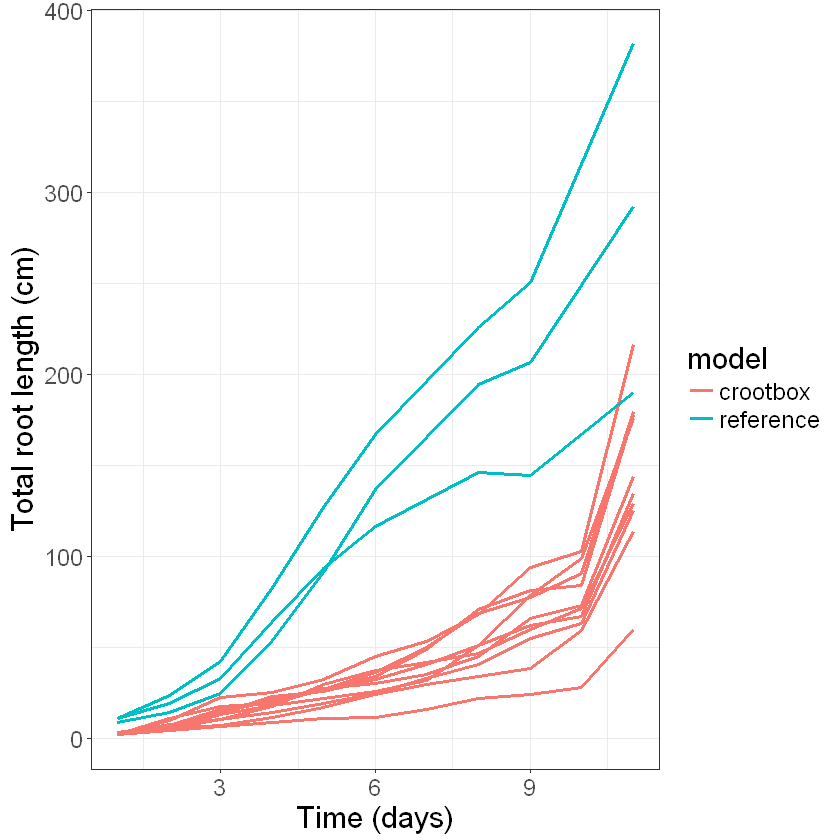

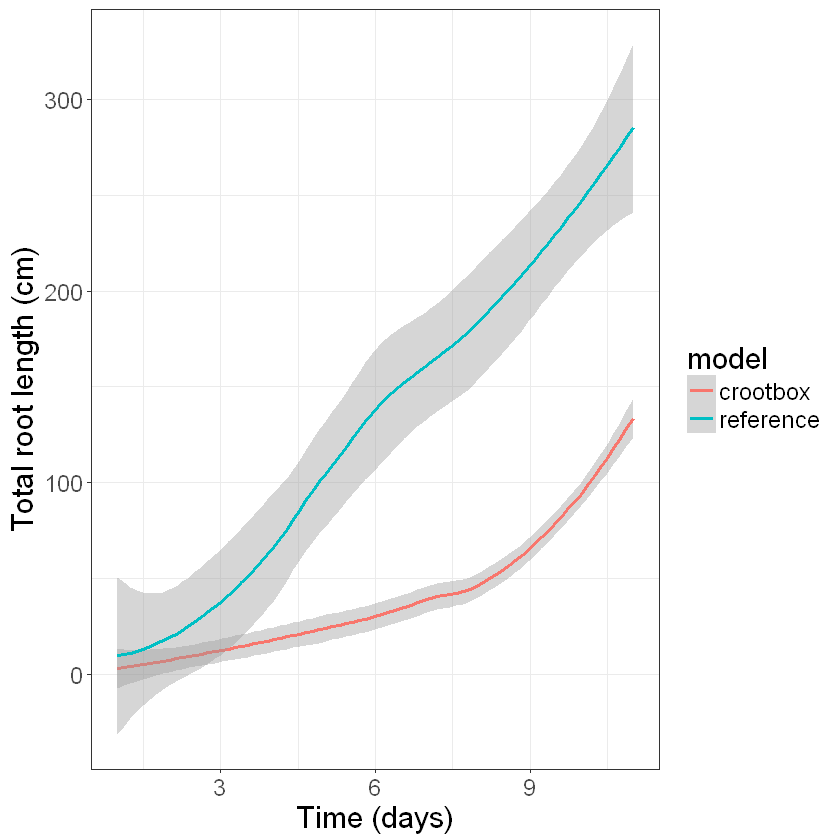

In [45]:
#####################
#Plot trait for dicot
#####################

#Plot results for all simulations
ggplot(datadicot)+
geom_line(aes(x=Time, y=TRL, colour=model, group=FileName), size=1)+
xlab("Time (days)")+
ylab("Total root length (cm)")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

#Plot average per simulation
ggplot(datadicot)+
stat_smooth(aes(x=Time, y=TRL, colour=model), size=1)+
xlab("Time (days)")+
ylab("Total root length (cm)")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

In [46]:
plant.monocot$ConvexhullXY<-NA
#datamonocot<-smartbind(plant.monocot, plant.mod1.monocot, plant.mod2.monocot) #Add more objects if needed
datamonocot<-smartbind(plant.monocot, plant.mod1.monocot)

`geom_smooth()` using method = 'loess'


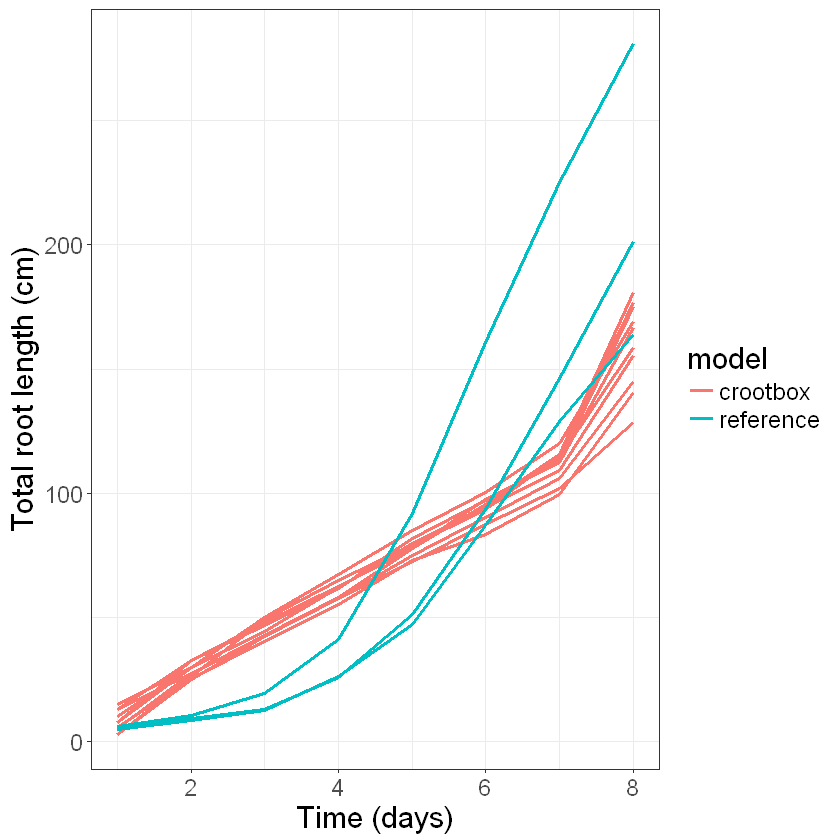

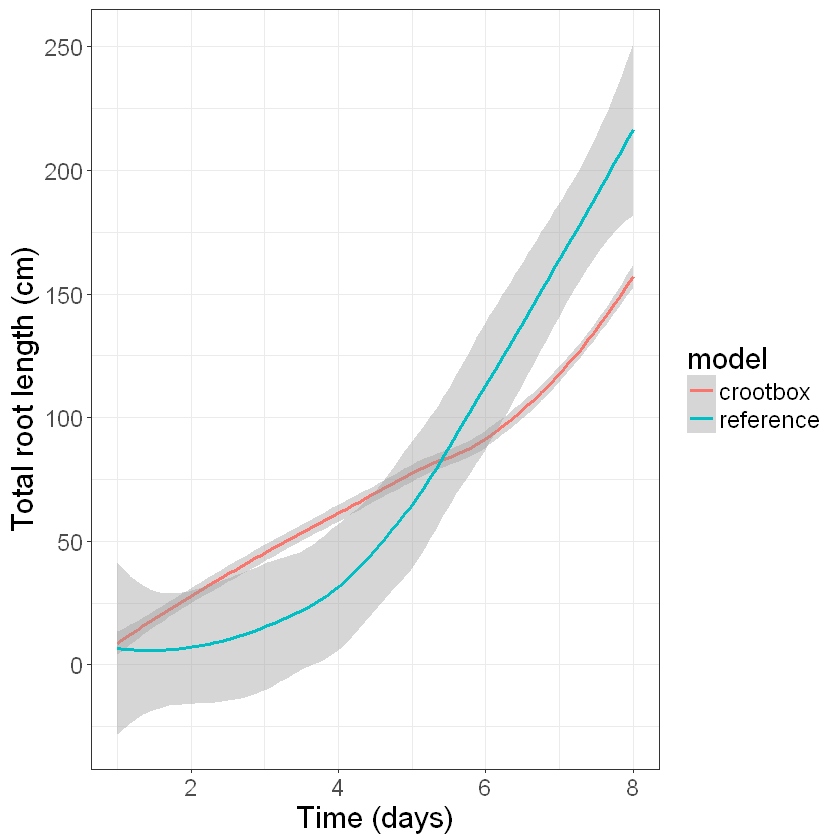

In [47]:
########################
#Plot trait for monocot
########################

#Plot results for all simulations
ggplot(datamonocot)+
geom_line(aes(x=Time, y=TRL, colour=model, group=FileName), size=1)+
xlab("Time (days)")+
ylab("Total root length (cm)")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

#Plot average per simulation
ggplot(datamonocot)+
stat_smooth(aes(x=Time, y=TRL, colour=model), size=1)+
xlab("Time (days)")+
ylab("Total root length (cm)")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

### 1.3. Assessing the degree of dissimilarity between simulated and reference root systems using dissimilarity metrics

The deviation between model predictions and ground truth experimental data will be quantified using performance measures listed in Table 1 of [Janssen and Heuberger (1995)](https://www.sciencedirect.com/science/article/pii/0304380095000849).

## Pipeline 2: _Comparing dissimilarities in architecture between simulated and reference root systems using persistent homology analysis_

### 2.1. Computing a persistence barcode for each simulated and reference root system using a geodesic distance function

Persistent homology is a mathematical framework allowing the topological analysis of branching structures, such as shoot and root systems. Recently, a new data analysis pipeline was implemented in archiDART to analyse root system architectures using persistent homology. More information can be found in [Li et al (2017)](https://onlinelibrary.wiley.com/doi/abs/10.3732/ajb.1700046) and [Delory et al (2018)](https://f1000research.com/articles/7-22/v1).

The main output of a persistent homology analysis is a persistence barcode recording the birth (apparition of a new connected component) and death (fusion of two connected components) of each branch when a distance function traverses the branching structure. For a given mathematical function, one persistence barcode can be computed for each simulated root system. Look at Figure 1 and interactive Figure 3 [in this paper](https://f1000research.com/articles/7-22/v1) for a more accurate description of a persistence barcode. Barcodes can be computed using the following code:

In [48]:
#######################################
#Compute persistence barcodes for dicot
#######################################

#table.dicot<-rbind(dicot[dicot$file=="lupin_d11",], mod1.dicot, mod2.dicot) #Add rsmlToTable objects if necessary
table.dicot<-rbind(dicot[dicot$file=="lupin_d11",], mod1.dicot)
ph.dicot<-perhomology(table.dicot, show.progress=TRUE)

#########################################
#Compute persistence barcodes for monocot
#########################################

#table.monocot<-rbind(monocot[monocot$file=="PL01_DAS08"|monocot$file=="PL08_DAS08"|monocot$file=="PL10_DAS08",], mod1.monocot, mod2.monocot) #Add rsmlToTable objects if necessary
table.monocot<-rbind(monocot[monocot$file=="PL01_DAS08"|monocot$file=="PL08_DAS08"|monocot$file=="PL10_DAS08",], mod1.monocot) #Add rsmlToTable objects if necessary
ph.monocot<-perhomology(table.monocot, show.progress=TRUE)

  |======================================================================| 100%

### 2.2. Computing dissimilarities between persistence barcodes using a bottleneck distance

To compare persistence barcodes against each other, a pairwise distance matrix is needed and the bottleneck distance is one possible option. The **bottleneck distance** is considered as a robust dissimilarity metric between two persistence barcodes, and its interpretation is quite straightforward: the greater the distance between two persistence barcodes, the greater will be the dissimilarity between them. Such pairwise bottleneck distance matrix can be calculated with the `bottleneckdist` function of the archiDART package. This function only requires a perhomology object as an input. It has to be noted that the computation time required to compute a bottleneck distance matrix is highly dependent on the number and complexity of root systems being compared.

In [49]:
#############################################
#Compute bottleneck distance matrix for dicot
#############################################

distance.dicot<-bottleneckdist(ph.dicot, show.progress=TRUE)

###############################################
#Compute bottleneck distance matrix for monocot
###############################################

distance.monocot<-bottleneckdist(ph.monocot, show.progress=TRUE)

  |======================================================================| 100%

### 2.3. Visualizing dissimilarities between root systems using multidimensional scaling

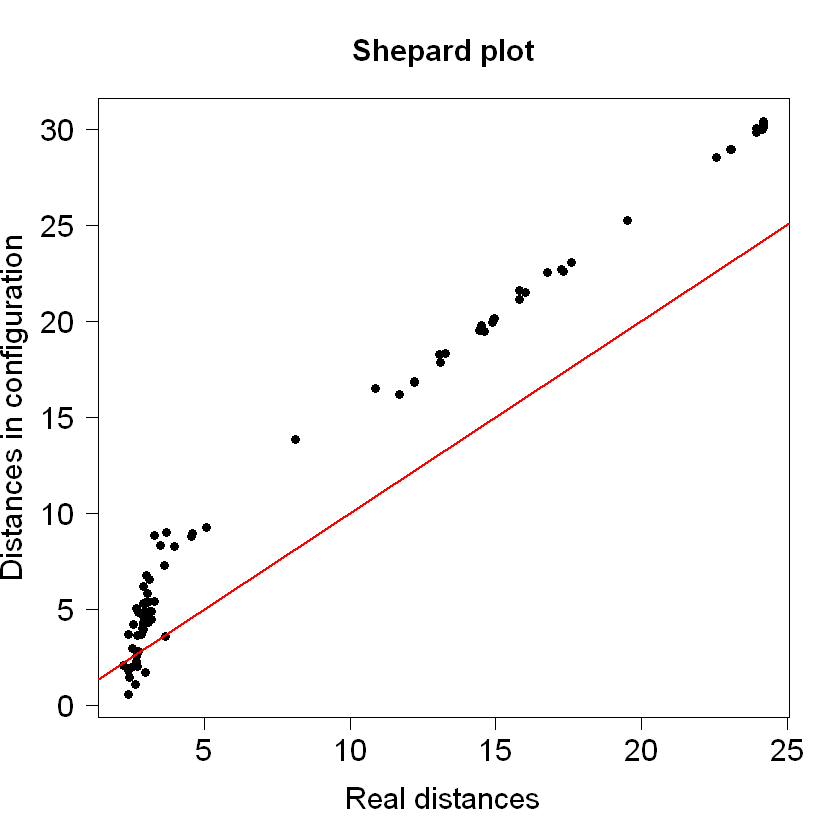

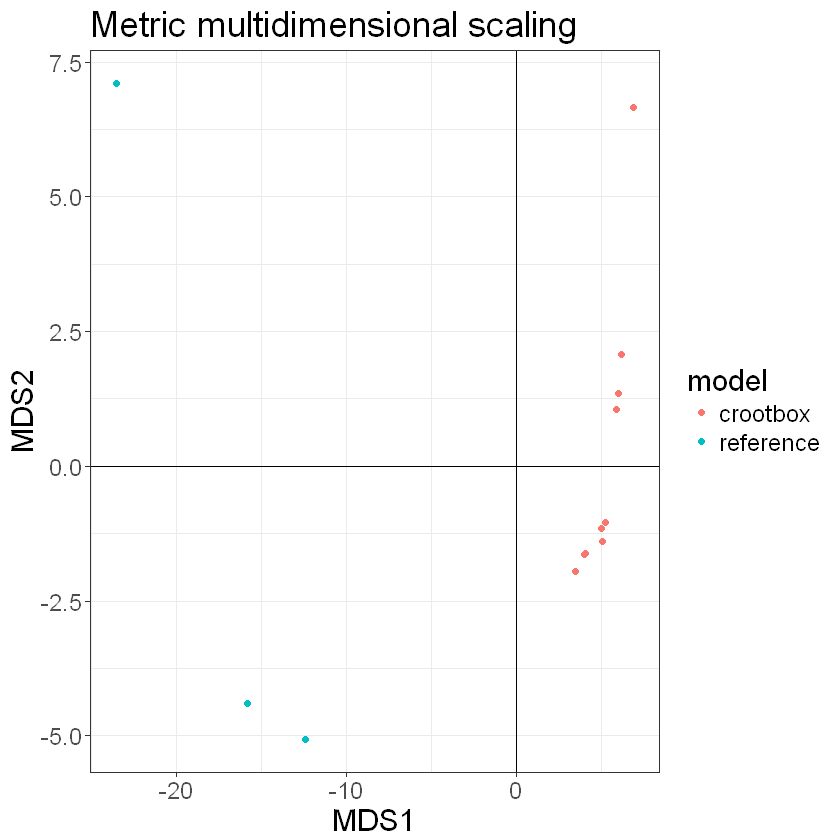

In [50]:
###################################
#Multidimensional scaling for dicot
###################################

#k is the number of dimensions
k<-3
mds.dicot<-cmdscale(distance.dicot, k=k, eig=TRUE, add=TRUE)

#Evaluate quality of representation using a Shepard plot
realdist<-as.vector(as.dist(distance.dicot))
confdist<-as.vector(dist(mds.dicot$points))
par(ps=18, cex=1, cex.main=1)
plot(realdist, confdist, xlab="Real distances", ylab="Distances in configuration", pch=16, main="Shepard plot", las=1)
abline(a=0, b=1, col="red", lwd=2)

#Plot MDS for dicot
model<-datadicot[datadicot$Time==11, "model"]
datamds<-data.frame(mds.dicot$points, model=model)
colnames(datamds)<-c(paste(rep("MDS", k), c(1:k), sep=""), "model")

ggplot(datamds)+
geom_point(aes(MDS1, MDS2, colour=model))+
geom_hline(yintercept=0)+
geom_vline(xintercept=0)+
ggtitle("Metric multidimensional scaling")+
xlab("MDS1")+
ylab("MDS2")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

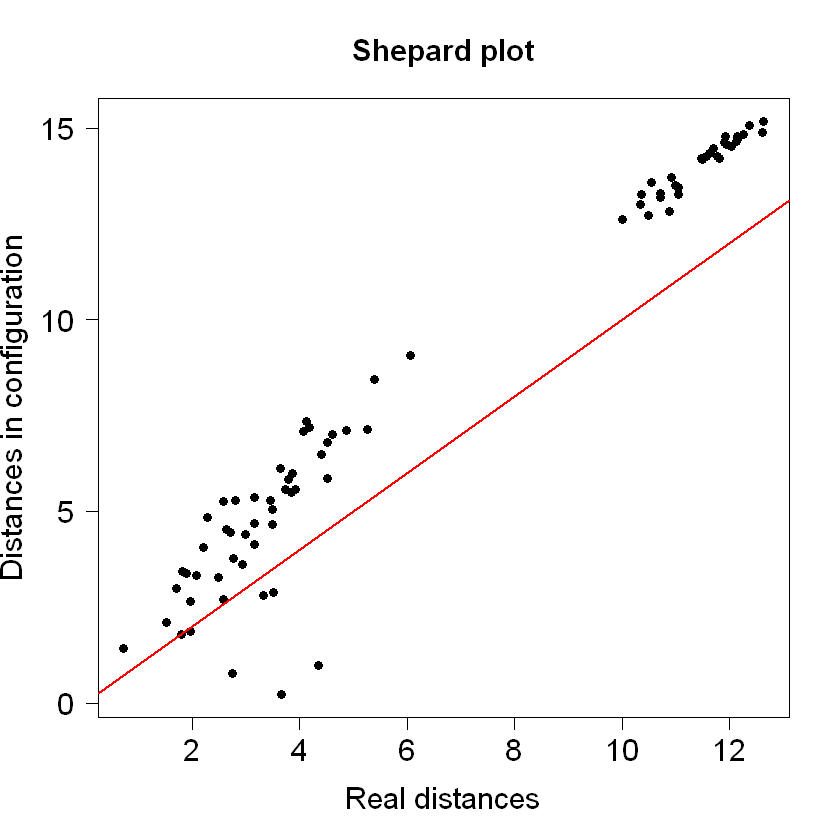

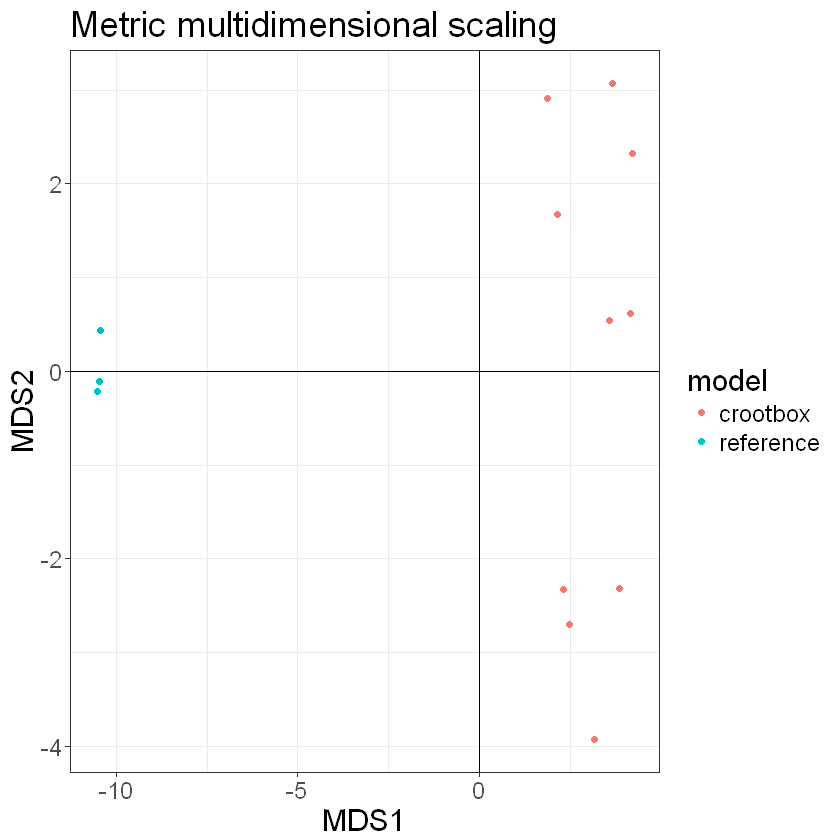

In [51]:
#####################################
#Multidimensional scaling for monocot
#####################################

#k is the number of dimensions
k<-3
mds.monocot<-cmdscale(distance.monocot, k=k, eig=TRUE, add=TRUE)

#Evaluate quality of representation using a Shepard plot
realdist<-as.vector(as.dist(distance.monocot))
confdist<-as.vector(dist(mds.monocot$points))
par(ps=18, cex=1, cex.main=1)
plot(realdist, confdist, xlab="Real distances", ylab="Distances in configuration", pch=16, main="Shepard plot", las=1)
abline(a=0, b=1, col="red", lwd=2)

#Plot MDS for dicot
model<-datamonocot[datamonocot$Time==8, "model"]
datamds<-data.frame(mds.monocot$points, model=model)
colnames(datamds)<-c(paste(rep("MDS", k), c(1:k), sep=""), "model")

ggplot(datamds)+
geom_point(aes(MDS1, MDS2, colour=model))+
geom_hline(yintercept=0)+
geom_vline(xintercept=0)+
ggtitle("Metric multidimensional scaling")+
xlab("MDS1")+
ylab("MDS2")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

### 2.4. Testing specific hypotheses


Call:
adonis(formula = as.dist(distance.dicot) ~ model, data = data.frame(file = rownames(distance.dicot),      model = model), permutations = 10000, sqrt.dist = TRUE) 

Permutation: free
Number of permutations: 10000

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
model      1    726.24  726.24  73.352 0.86959 0.0039 **
Residuals 11    108.91    9.90         0.13041          
Total     12    835.15                 1.00000          
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 1000

Response: Distances
          Df Sum Sq Mean Sq     F N.Perm  Pr(>F)  
Groups     1 11.788 11.7881 4.005   1000 0.05794 .
Residuals 11 32.377  2.9433                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

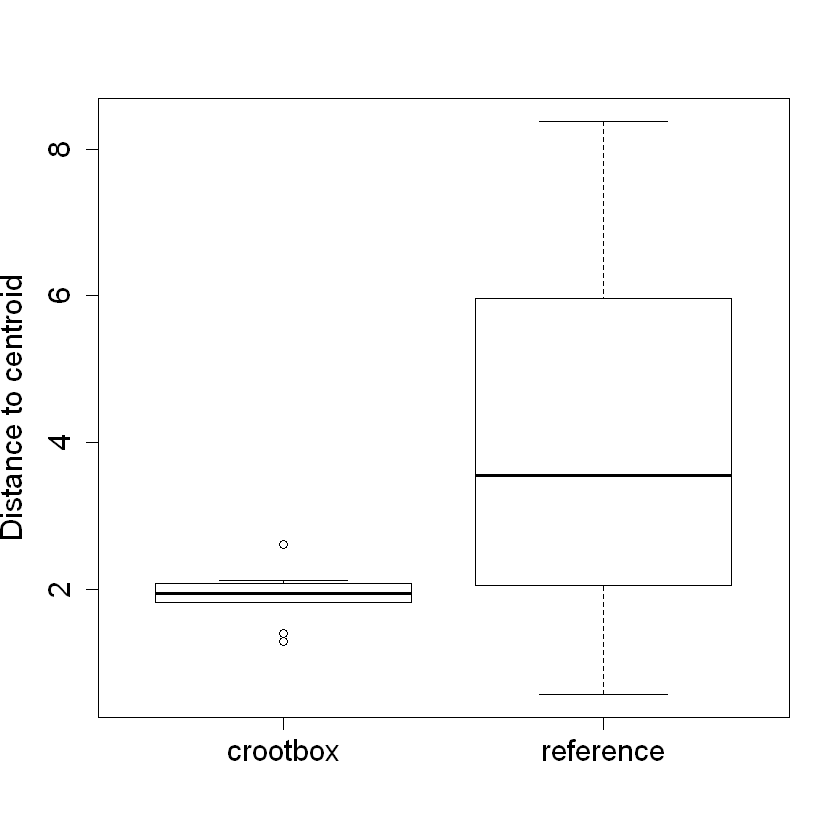

In [52]:
################
#PERMANOVA dicot
################

permanova.dicot<-adonis(as.dist(distance.dicot)~model, data=data.frame(file=rownames(distance.dicot), model=model),
                        permutations = 10000, sqrt.dist=TRUE)
permanova.dicot

#Chech PERMANOVA assumption (multivariate homogeneity of group dispersions)
bd<-betadisper(as.dist(distance.dicot), model)
par(ps=18, cex=1, cex.main=1)
boxplot(bd)
permutest(bd, permutations=1000)


Call:
adonis(formula = as.dist(distance.monocot) ~ model, data = data.frame(file = rownames(distance.monocot),      model = model), permutations = 10000, sqrt.dist = TRUE) 

Permutation: free
Number of permutations: 10000

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
model      1    281.10 281.104  46.497 0.80868 0.0046 **
Residuals 11     66.50   6.046         0.19132          
Total     12    347.61                 1.00000          
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 1000

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1 0.0639 0.06386 0.0985   1000 0.7493
Residuals 11 7.1313 0.64830                     

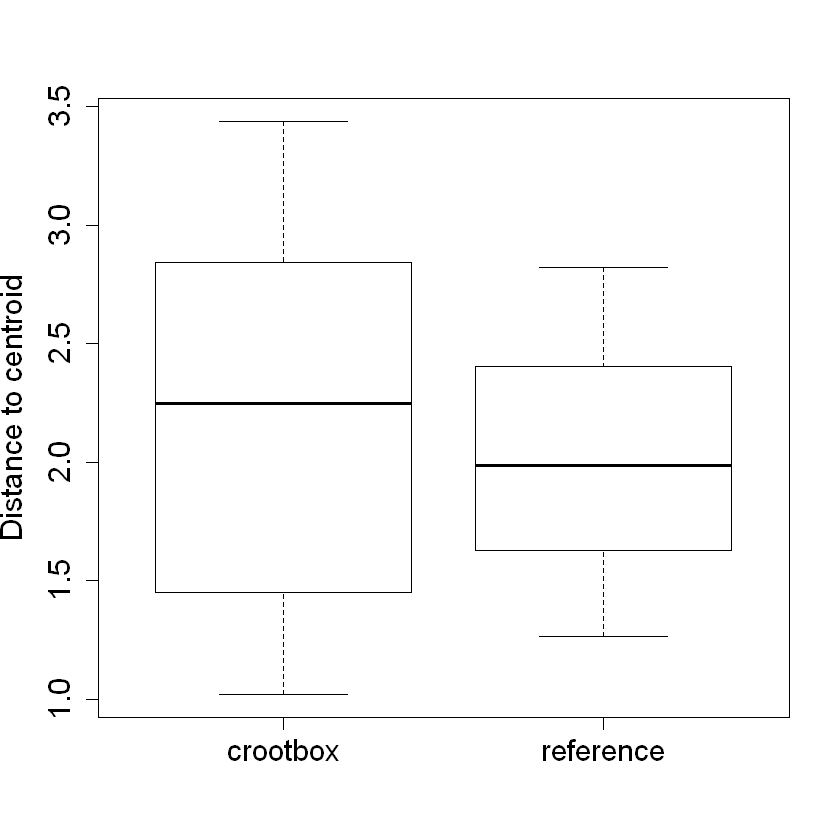

In [53]:
##################
#PERMANOVA monocot
##################

permanova.monocot<-adonis(as.dist(distance.monocot)~model, data=data.frame(file=rownames(distance.monocot), model=model), 
                          permutations = 10000, sqrt.dist=TRUE)
permanova.monocot

#Chech PERMANOVA assumption (multivariate homogeneity of group dispersions)
bd<-betadisper(as.dist(distance.monocot), model)
par(ps=18, cex=1, cex.main=1)
boxplot(bd)
permutest(bd, permutations=1000)

## References

Delory, B. M., Baudson, C., Brostaux, Y., Lobet, G., du Jardin, P., Pagès, L., and Delaplace,P. (2016). [archiDART: an R package for the automated computation of plant root architectural traits](https://link.springer.com/article/10.1007/s11104-015-2673-4). _Plant and Soil_, 398(1):351–365.

Delory, B. B. M., Li, M., Topp, C. C. N., and Lobet, G. (2018). [archiDART v3.0: A new data analysis pipeline allowing the topological analysis of plant root systems](https://f1000research.com/articles/7-22/v1). _F1000Research_, 7:22.

Fitter, A.H. (1986). [The topology and geometry of plant root systems: influence of watering rate on root system topology in _Trifolium pratense_](https://academic.oup.com/aob/article/58/1/91/174778). _Annals of Botany_, 58(1):91–101.

Fitter, A.H. (1987). [An architectural approach to the comparative ecology of plant root systems](https://nph.onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-8137.1987.tb04683.x). _New Phytologist_, 106(s1):61–77.

Hund, A., Trachsel, S., and Stamp, P. (2009). [Growth of axile and lateral roots of maize: Idevelopment of a phenotying platform](https://link.springer.com/article/10.1007/s11104-009-9984-2). _Plant and Soil_, 325(1):335–349.

Janssen, P.H.M. and Heuberger, P.S.C. (1995). [Calibration of process-oriented models](https://www.sciencedirect.com/science/article/pii/0304380095000849). _Ecological Modelling_, 83:55-66.

Lobet, G., Pagès, L., and Draye, X. (2011). [A novel image-analysis toolbox enabling quantitative analysis of root system architecture](http://www.plantphysiol.org/content/157/1/29). _Plant Physiology_, 157:29–39.

Lobet, G., Pound, M. P., Diener, J., Pradal, C., Draye, X., Godin, C., Javaux, M., Leitner, D.,Meunier, F., Nacry, P., Pridmore, T. P., and Schnepf, A. (2015). [Root System Markup Language: toward an unified root architecture description language](http://www.plantphysiol.org/content/167/3/617). _Plant Physiology_, 167:617–627.